<a href="https://colab.research.google.com/github/diwakarojha/Tensorflow_Keras/blob/main/5_Word_Embeddings_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import  pad_sequences
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense , Embedding, Flatten, GlobalAveragePooling1D, LSTM, Bidirectional
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
path=tf.keras.utils.get_file('reviews.csv','https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print(path)

131072/127831 [==============================] - 0s 0us/step
/root/.keras/datasets/reviews.csv


In [3]:
reviews=pd.read_csv('/root/.keras/datasets/reviews.csv')

In [4]:
text=reviews.text.values
sentiment=reviews.sentiment
reviews['sentiment'].value_counts()
text

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming and I think we'll just go to Ninja Sushi next time.",
       "Then as if I hadn't wasted enough of my life there they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [5]:
vocab_size=500
padding='post'
truct='post'
emb_dim=16
max_length=50
tokenizer=Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(text)

In [6]:
word_index=tokenizer.word_index
word_index.keys()

dict_keys(['<OOV>', 'the', 'and', 'i', 'a', 'it', 'to', 'is', 'was', 'this', 'of', 'not', 'for', 'my', 'in', 'with', 'very', 'good', 'great', 'phone', 'that', 'on', 'have', 'you', 'food', 'had', 'place', 'so', 'but', 'service', 'are', 'be', 'we', 'all', 'as', 'at', 'like', 'they', 'time', 'back', 'one', 'were', 'quality', 'would', 'really', 'here', 'if', 'from', 'well', 'your', 'just', 'product', 'up', 'best', "don't", 'no', 'will', 'an', 'there', 'go', 'me', 'has', 'only', 'also', 'works', "i've", 'out', 'headset', 'nice', 'ever', 'battery', "it's", 'sound', 'than', 'use', 'or', 'when', "i'm", 'our', 'get', 'what', 'their', 'after', 'love', 'been', 'did', 'excellent', 'recommend', 'even', 'more', 'again', 'first', 'too', 'work', 'which', 'ear', 'about', '2', 'better', 'can', 'never', 'price', 'any', 'could', 'bad', 'because', 'do', 'made', 'got', 'case', 'pretty', 'much', 'by', 'now', 'disappointed', 'worst', 'friendly', 'does', 'them', 'some', 'then', 'think', 'am', 'came', 'minutes'

In [7]:
review_seq=tokenizer.texts_to_sequences(text)

In [ ]:
review_pad_seq=pad_sequences(review_seq, maxlen=max_length, padding=padding,truncating=truct)

In [8]:
review_pad_seq.shape

NameError: ignored

In [ ]:
X=np.array(review_pad_seq,dtype=np.int32)
Y=np.array(sentiment,dtype=np.int32)
X.shape

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

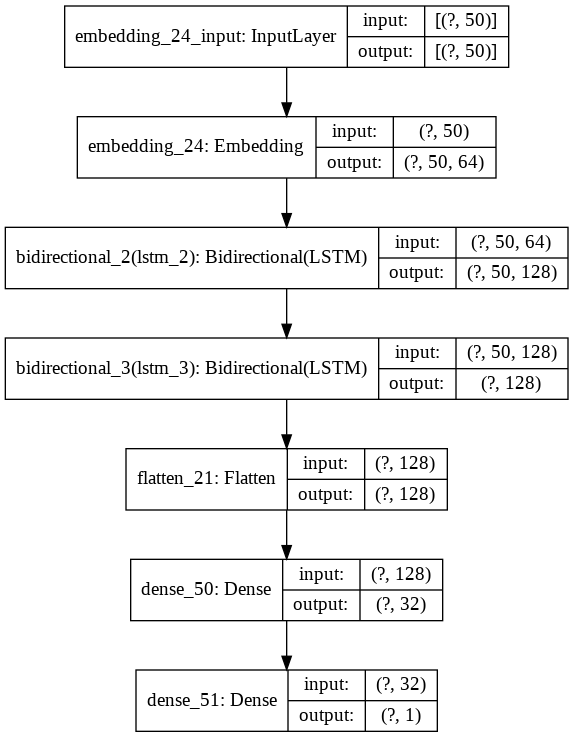

In [ ]:
model=tf.keras.models.Sequential(
    [Embedding(vocab_size,64,input_length=max_length),
     Bidirectional(LSTM(64,return_sequences=True)),
     Bidirectional(LSTM(64))
     Flatten(),
     Dense(32,activation='relu'),
     Dense(1,activation='sigmoid')]
)

#lrScheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-6*10**(epoch/30))

early_stop=tf.keras.callbacks.EarlyStopping(patience=10)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=5e-4),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])
plot_model(model,show_shapes=True)


In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[early_stop])

Epoch 1/30
50/50 [==============================] - 6s 130ms/step - loss: 0.6929 - accuracy: 0.5261 - val_loss: 0.6909 - val_accuracy: 0.5589
Epoch 2/30
50/50 [==============================] - 5s 105ms/step - loss: 0.6437 - accuracy: 0.6472 - val_loss: 0.5443 - val_accuracy: 0.7143
Epoch 3/30
50/50 [==============================] - 5s 105ms/step - loss: 0.4211 - accuracy: 0.8117 - val_loss: 0.4868 - val_accuracy: 0.7719
Epoch 4/30
50/50 [==============================] - 5s 106ms/step - loss: 0.2987 - accuracy: 0.8726 - val_loss: 0.5406 - val_accuracy: 0.7669
Epoch 5/30
50/50 [==============================] - 5s 106ms/step - loss: 0.2631 - accuracy: 0.8920 - val_loss: 0.5973 - val_accuracy: 0.7193
Epoch 6/30
50/50 [==============================] - 5s 106ms/step - loss: 0.2382 - accuracy: 0.9052 - val_loss: 0.5674 - val_accuracy: 0.7895
Epoch 7/30
50/50 [==============================] - 5s 106ms/step - loss: 0.2123 - accuracy: 0.9171 - val_loss: 0.5393 - val_accuracy: 0.7794
Epoch 

In [ ]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.7544


[0.5136810541152954, 0.7543859481811523]

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 64)


In [ ]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
embedding_layer=model.layers[0]
weights=embedding_layer.get_weights()[0]
weights.shape

(512, 64)